## Итоговая работа 16.05.2021
### Тихонова Инна

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
from pandas.api.types import is_string_dtype

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import scipy.stats as stats

**Задание 1**

Загрузите файл HR.csv в pandas dataframe.

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Задание 2**

Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
def get_basics():

    basics = []
    b_columns = ['column', 'count', 'mean', 'median', 'mode', 'min', 'max', 'var', 'std']

    for col in df.columns:
        if is_string_dtype(df[col]):
            continue
        
        basics.append([col, 
                       df[col].count(), 
                       np.mean(df[col]), 
                       df[col].median(), 
                       df[col].mode()[0], 
                       df[col].min(),
                       df[col].max(),
                       round(np.var(df[col]), 2),
                       round(np.std(df[col]), 2)])

    return pd.DataFrame(data = basics, columns = b_columns).set_index('column')
    
    
basics = get_basics()
basics

,count,mean,median,mode,min,max,var,std
column,,,,,,,,
satisfaction_level,14999,0.612834,0.64,0.10,0.09,1.0,0.06,0.25
last_evaluation,14999,0.716102,0.72,0.55,0.36,1.0,0.03,0.17
number_project,14999,3.803054,4.00,4.00,2.00,7.0,1.52,1.23
average_montly_hours,14999,201.050337,200.00,135.00,96.00,310.0,2494.15,49.94
time_spend_company,14999,3.498233,3.00,3.00,2.00,10.0,2.13,1.46
Work_accident,14999,0.144610,0.00,0.00,0.00,1.0,0.12,0.35
left,14999,0.238083,0.00,0.00,0.00,1.0,0.18,0.43
promotion_last_5years,14999,0.021268,0.00,0.00,0.00,1.0,0.02,0.14


**Задание 3**

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
df.corr().style.bar(align='mid', color='green')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Самые скоррелированные переменные: 
 - left,
 - satisfaction_level,
 
Т.е. чем ниже уровень удовлетворенности сотрудника, тем выше вероятность, что он уволится. 

Две наименее скоррелированные переменные:
 - average_montly_hours,
 - promotion_last_5years,
 
Т.е. среднее количество часов на работе никак не влияет на повышение сотрудника. 

**Задание 4**

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [6]:
df = df.reset_index()
df = df.rename(columns={'index': 'id'})

In [7]:
df_pivot = df.pivot_table(index='department', values='id', aggfunc='count')
df_pivot.columns = ['count_in_dep']
df_pivot

,count_in_dep
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


**Задание 5**

Показать распределение сотрудников по зарплатам.

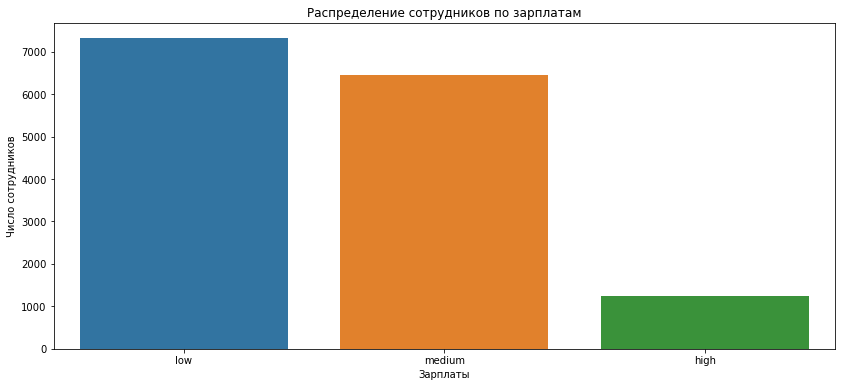

In [8]:
sns.countplot(data = df, x = 'salary')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплаты')
plt.ylabel('Число сотрудников')
plt.show()

**Задание 6**

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

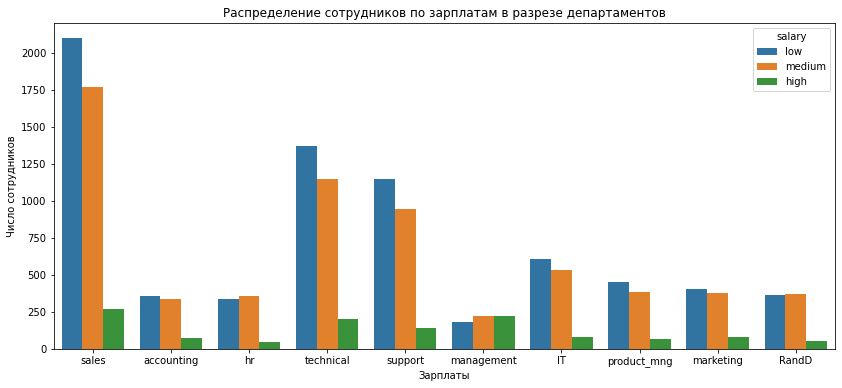

In [9]:
sns.countplot(data = df, x = 'department', hue = 'salary')
plt.title('Распределение сотрудников по зарплатам в разрезе департаментов')
plt.xlabel('Зарплаты')
plt.ylabel('Число сотрудников')
plt.show()

**Задание 7**

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Нулевая и альтернативная гипотезы:

 - H0: Среднее количество часов на работе для сотрудников с высокой и низкой зарплатой равны.
 - H1: Среднее количество часов на работе для сотрудников с высокой и низкой зарплатой не равны.

In [10]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df_low = df[df['salary'] == 'low']['average_montly_hours']

In [12]:
df_high = df[df['salary'] == 'high']['average_montly_hours']

In [13]:
f, p = stats.ttest_ind(df_low, df_high)

In [14]:
alpha = 0.05  

if p > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Т.е. среднее количество часов на работе для сотрудников с высокой и низкой зарплатой не равны.

**Задание 8**

Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
 - Доля сотрудников с повышением за последние 5 лет
 - Средняя степень удовлетворенности
 - Среднее количество проектов

In [15]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
title = {0: '--Показатели среди оставшихся сотрудников--',
         1: '--Показатели среди уволившихся сотрудников--'}

for is_left in range(2):
    
    print(title[is_left])
    print('Доля сотрудников с повышением за последние 5 лет: {:.2%}'.format(df[df['left'] == is_left]
                                                                            ['promotion_last_5years'].mean()))
    
    print('Средняя степень удовлетворенности: {:.2%}'.format(df[df['left'] == is_left]
                                                             ['satisfaction_level'].mean()))
    
    print('Среднее количество проектов: {:.2f}'.format(df[df['left'] == is_left]['number_project'].mean()))
    print()

--Показатели среди оставшихся сотрудников--
Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 66.68%
Среднее количество проектов: 3.79

--Показатели среди уволившихся сотрудников--
Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 44.01%
Среднее количество проектов: 3.86



**Задание 9**

Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [17]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
params = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
             'Work_accident', 'promotion_last_5years']]
target = df['left']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(params, target, test_size=0.25)

In [20]:
lda = LinearDiscriminantAnalysis()

In [21]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
lda.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
accuracy_score(y_test, lda.predict(X_test))

0.7584

Модель предскажет увольнение сотрудника в 3 случаях из 4-х.